___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Microestructuras y Sistemas de Trading
## Laboratorio 3
### Equipo C

## <font color="navy">  "PARADOX OF CHOICE"
    
* <font color="black">**INTEGRANTE 1 :**</font> Mariana López Correa
* <font color="black">**INTEGRANTE 2 :**</font> Axel Francisco Munguía Quintero
* <font color="black">**INTEGRANTE 2 :**</font> Marysol Cantarero Velazquez Del Valle 
* <font color="black">**INTEGRANTE 2 :**</font> Gaspar Benitez Fregoso

### <font color = navy> Situación
Utilizar la información histórica de la cuenta de trader manual y, mediante la formulación y programación de 1 "Sesgo cognitivo", realizar una evaluación del desempeño de la cuenta utilizando el marco de "Behavioral economics". 

### <font color = navy> Objetivo
Inferir si al momento de tomar las deciciones que se tomaron encuenta, se estuvo incurriendo en el sesgo cognitivo seleccionado y su impacto en el resultado final.
    
### <font color = navy> Sesgo cognitivo que elegimos    
Paradox of Choice

Paradox of Choice is a book by Barry Schwartz that explains that while conventional wisdom tells us that more choice leads to more freedom and more happiness, research shows that giving people many choices does not increase performance or satisfaction, and often leads to paralysis and dissatisfaction.

Examples:

1). Fifty independent studies found a meaningful connection between choice and anxiety. 

2). One Vanguard study showed that for every ten mutual funds added to a retirement plan, participation dropped by an additional 2%. (Schwartz, 2005)


1) SOBRE SESGO COGNITIVO ELEGIDO
FALTA EJEMPLO GENERICO!!!
CASO APLICADO A TRADING!!

2) PASOS PARA CALCULARLO!!(PSEUDOCÓDIGO)

3)REPASO DE CÓDIGO

4) PRESENTAR DATOS

5) PRESENTAR GRAFICA

### <font color = navy> Procedimiento

Importando librerías

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime , timedelta
from matplotlib import style
style.use("ggplot")

Descargando información de trader 

In [27]:
data= pd.read_excel("archivo_tradeview_2.xlsx",index_col='openTime').sort_index()
#data.index=pd.DatetimeIndex(data.index)
data.head() #primeros 5 datos

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
openTime,,,,,,,,,,,,,
2019.08.27 06:18:03,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27 06:22:44,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27 06:23:44,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27 06:45:16,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27 06:52:01,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88


In [28]:
data.tail() #últimos 5 datos

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
openTime,,,,,,,,,,,,,
2019.09.25 01:54:46,25159303,sell,0.01,xauusd,1531.28000,1537.0000,0.000,2019.09.25 15:24:35,1527.36000,0.00,0,0,3.92
2019.09.25 18:22:33,25188529,buy,0.08,usdmxn,19.56233,19.5900,19.900,2019.09.26 21:00:44,19.57897,0.00,0,0,6.80
2019.09.25 18:23:20,25188553,buy,0.01,usdmxn,19.56103,19.5900,19.900,2019.09.26 21:00:44,19.58247,0.00,0,0,1.09
2019.09.25 20:05:46,25193432,buy,0.08,eurusd,1.09455,1.0915,1.111,2019.09.26 22:33:46,1.09148,0.00,0,0,-24.56
2019.09.26 20:20:58,25229583,buy,0.09,btcusd,7910.75000,0.0000,0.000,2019.09.27 15:49:19,7986.78000,-1.07,0,0,6.84


In [29]:
data.index = [data.index[k][:10] for k in range(data.shape[0])]  # Quitando la hora del índice, dejando solo fecha : "yyy.mm.dd"
data.head() #primeros 5 datos

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.27,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88


In [30]:
data.tail() #últimos 5 datos

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.09.25,25159303,sell,0.01,xauusd,1531.28000,1537.0000,0.000,2019.09.25 15:24:35,1527.36000,0.00,0,0,3.92
2019.09.25,25188529,buy,0.08,usdmxn,19.56233,19.5900,19.900,2019.09.26 21:00:44,19.57897,0.00,0,0,6.80
2019.09.25,25188553,buy,0.01,usdmxn,19.56103,19.5900,19.900,2019.09.26 21:00:44,19.58247,0.00,0,0,1.09
2019.09.25,25193432,buy,0.08,eurusd,1.09455,1.0915,1.111,2019.09.26 22:33:46,1.09148,0.00,0,0,-24.56
2019.09.26,25229583,buy,0.09,btcusd,7910.75000,0.0000,0.000,2019.09.27 15:49:19,7986.78000,-1.07,0,0,6.84


Separando la información por fecha.

In [31]:
dataframes = []  # lista vacia
unicos = np.unique(data.index)  # del índice se buscan las fechas únicas para clasificar la información de acuerdo a estas.
for k in range(len(unicos)):
    dataframes.append(pd.DataFrame(data.loc[data.index==unicos[k],:])) #agregando a la lista los dataframes con la info separada.

In [32]:
dataframes[0] # información del día 27/08/2019

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.27,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88
2019.08.27,24316034,buy,0.04,xauusd,1529.21000,1523.0000,1543.000,2019.08.27 09:16:01,1533.69000,0.0,0,0,17.92
2019.08.27,24318553,sell,0.05,eurgbp,0.90821,0.9120,0.903,2019.08.27 13:31:11,0.90559,0.0,0,0,16.07
2019.08.27,24325707,sell,0.04,eurusd,1.11060,1.1130,1.107,2019.08.27 13:57:03,1.11093,0.0,0,0,-1.32
2019.08.27,24325723,sell,0.04,eurusd,1.11062,1.1130,1.107,2019.08.27 13:57:57,1.11079,0.0,0,0,-0.68
2019.08.27,24325740,sell,0.05,eurusd,1.11049,1.1130,1.107,2019.08.27 14:02:05,1.11090,0.0,0,0,-2.05


In [33]:
dataframes[1] # información del día 28/08/2019

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.28,24392456,buy,0.04,eurusd,1.10791,1.1015,1.1175,2019.08.30 17:57:15,1.10150,0.0,0,0,-25.64
2019.08.28,24373260,buy,0.01,eurusd,1.10791,1.1040,1.1175,2019.08.29 06:38:28,1.10818,0.0,0,0,0.27


In [34]:
dataframes[2] # información del día 29/08/2019

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.29,24392440,buy,0.04,gbpusd,1.22024,1.2080,1.237,2019.08.29 15:01:43,1.22173,0.0,0,0,5.96
2019.08.29,24392415,buy,0.01,gbpusd,1.22024,1.2080,1.237,2019.08.29 06:37:23,1.21990,0.0,0,0,-0.34
2019.08.29,24392425,buy,0.01,gbpjpy,129.23400,128.0000,132.200,2019.08.29 06:36:58,129.21000,0.0,0,0,-0.23
2019.08.29,24392432,buy,0.04,gbpjpy,129.23400,128.0000,132.200,2019.08.29 15:01:24,129.80100,0.0,0,0,21.35
2019.08.29,24416172,buy,0.04,eurusd,1.10543,1.1040,0.000,2019.08.29 19:56:51,1.10518,0.0,0,0,-1.00
2019.08.29,24416187,buy,0.05,eurusd,1.10545,1.1015,0.000,2019.08.30 17:57:14,1.10150,0.0,0,0,-19.75
2019.08.29,24417804,buy,0.05,xauusd,1528.76000,1524.0000,1555.000,2019.08.29 21:11:08,1523.80000,0.0,0,0,-24.80


##### Función para seleccionar índice y valores con rendimientos positivos

Con estas función creada, el objetivo es conocer el número de activos que tuvieron rendimiento positivo durante el día ( Si se tuvieron más posiciones de pérdida que de ganancia sobre un activo no se tomará)

(a)En la primera parte se hace dataframe con sumas por símbolo, (b)en la segunda parte se hace lista del dataframe con valores True si es positivo y False negativo. (c)Juntando estas dos partes del código se crea un dataframe con los valores cuando sea True y NaN cuando sea False, de tal manera que .dropna() eliminará los valores negativos. La última parte selecciona el índice de estos valores y los mismos valores en formato de lista.


In [163]:
def choose_index_values(dataframe,l):
    a = dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()
    #b = [dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()>0]
    c = a[a>0].dropna()
    index = c.index.values.tolist()
    values = c.values.tolist()
    return index, values

In [176]:
def choose_index(dataframe,l):
    return dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().index.values.tolist()

##### Función para seleccionar valores 

En la primera parte se hace dataframe con sumas por símbolo, en la segunda parte se hace lista del dataframe con valores True si es positivo y False negativo. Juntando estas dos partes del código se crea un dataframe con los valores cuando sea True y NaN cuando sea False, de tal manera que .dropna() eliminará los valores negativos. La última parte selecciona los valores para hacerlos lista.

In [177]:
def choose_values(dataframe,l):
    return  dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().values.tolist()

In [305]:
profits_day = [choose_index_values(dataframes,l) for l in range(len(dataframes))]
profits_day[1]

([], [])

In [254]:
# Conocer el No. de Activos que tuvieron rendimiento positivo durante el día (Si tuviste más posiciones de pérdia
# que de ganancia sobre un activo no se tomará)
profits_day = [list(zip(*[choose_index(dataframes,l),choose_values(dataframes,l)])) for l in range(len(dataframes))]
profits_day = [l for l in profits_day if len(l)>=1]
profits_day

[[('eurgbp', [16.07]), ('xauusd', [17.92])],
 [('gbpjpy', [21.12]), ('gbpusd', [5.62])],
 [('usdjpy', [20.41]), ('xauusd', [17.8])],
 [('audusd', [10.270000000000001])],
 [('usdcad', [29.11])],
 [('eurusd', [3.0]), ('gbpusd', [9.35])],
 [('usdcad', [11.52])],
 [('eurusd', [22.240000000000002]),
  ('usdjpy', [2.14]),
  ('xauusd', [19.860000000000003])],
 [('gbpusd', [21.78])],
 [('eurusd', [17.22]), ('usdmxn', [43.0]), ('xauusd', [93.06])],
 [('eurusd', [23.34]), ('gbpusd', [34.32]), ('xauusd', [3.42])],
 [('eurusd', [10.979999999999999])],
 [('eurusd', [30.42]), ('gbpusd', [1.56]), ('usdmxn', [15.33])],
 [('xauusd', [50.29])],
 [('usdmxn', [7.89]), ('xauusd', [25.880000000000003])],
 [('btcusd', [6.84])]]

Graficando ganancias para analizar la información

In [255]:
[np.mean([k[1] for k in l]) for l in profits_day ]

[16.995,
 13.370000000000001,
 19.105,
 10.270000000000001,
 29.11,
 6.175,
 11.52,
 14.74666666666667,
 21.78,
 51.093333333333334,
 20.36,
 10.979999999999999,
 15.770000000000001,
 50.29,
 16.885,
 6.84]

TypeError: can only concatenate str (not "list") to str

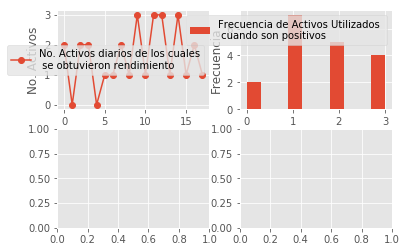

In [252]:
fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
ax.plot([len(profits_day[l][0]) for l in range(len(dataframes))],"o-", label="No. Activos diarios de los cuales\n se obtuvieron rendimiento")
ax.legend()
ax.set_xlabel("Días")
ax.set_ylabel("No. Activos")
ax1.hist([len(profits_day[l][0]) for l in range(len(dataframes))],stacked=True, label="Frecuencia de Activos Utilizados \n cuando son positivos")
ax1.set_xlabel("No. Activos")
ax1.legend()
ax1.set_ylabel("Frecuencia")

ax2.plot([np.mean([k[1] for k in l]) for l in profits_day ],"o-", label="Ganancia Promedio por día")
ax2.legend()
ax2.set_xlabel("Días")
ax2.set_ylabel("Dinero ")
plt.subplots_adjust(right=2., top=2.)
plt.show()

TypeError: can only concatenate str (not "list") to str

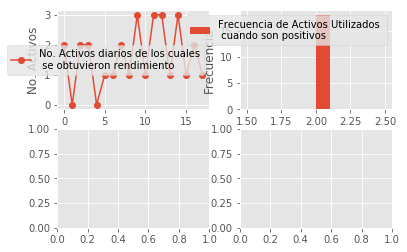

In [250]:
fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
ax.plot([len(l) for l in profits_day],"o-", label="No. Activos diarios de los cuales\n se obtuvieron rendimiento")
ax.legend()
ax.set_xlabel("Días")
ax.set_ylabel("No. Activos")
ax1.hist([len(l) for l in profits_day],stacked=True, label="Frecuencia de Activos Utilizados \n cuando son positivos")
ax1.set_xlabel("No. Activos")
ax1.legend()
ax1.set_ylabel("Frecuencia")
ax2.plot([np.mean([k[1] for k in l]) for l in profits_day ],"o-", label="Ganancia Promedio por día")
ax2.legend()
ax2.set_xlabel("Días")
ax2.set_ylabel("Dinero ")
ax3.hist([np.mean([k[1] for k in l]) for l in profits_day ], label="Frecuecia Ganancia Promedio por día")
ax3.legend()
ax3.set_xlabel("Dinero")
ax3.set_ylabel("Frecuencia")
plt.subplots_adjust(right=2., top=2.)
plt.show()

In [141]:
# Conocer el No. de Activos que tuvieron rendimiento positivo durante el día (Si tuviste más posiciones de pérdia
# que de ganancia sobre un activo no se tomará)
def choose_index(dataframe,l):
    return dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().index.values.tolist()
def choose_values(dataframe,l):
    return  dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().values.tolist()
no_profits_day = [list(zip(*[choose_index(dataframes,l),choose_values(dataframes,l)])) for l in range(len(dataframes))]
no_profits_day = [l for l in no_profits_day if len(l)>=1]
no_profits_day

[[('eurjpy', [-9.16]), ('eurusd', [-4.93])],
 [('eurusd', [-25.37])],
 [('eurusd', [-20.75]), ('xauusd', [-24.8])],
 [('eurusd', [-25.8]),
  ('gbpusd', [-33.64]),
  ('usdcad', [-18.200000000000003])],
 [('gbpjpy', [-14.55]), ('usdjpy', [-21.88]), ('xauusd', [-68.0])],
 [('audusd', [-12.1])],
 [('eurusd', [-4.5])],
 [('usdmxn', [-29.39])],
 [('eurusd', [-24.56])]]

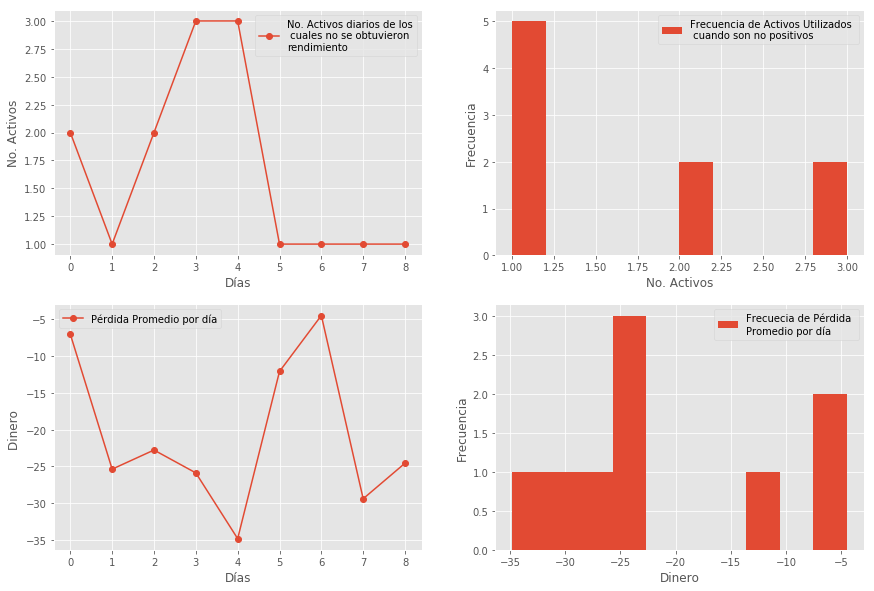

In [144]:
fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
ax.plot([len(l) for l in no_profits_day],"o-", label="No. Activos diarios de los\n cuales no se obtuvieron \nrendimiento")
ax.legend()
ax.set_xlabel("Días")
ax.set_ylabel("No. Activos")
ax1.hist([len(l) for l in no_profits_day],stacked=True, label="Frecuencia de Activos Utilizados \n cuando son no positivos")
ax1.set_xlabel("No. Activos")
ax1.legend()
ax1.set_ylabel("Frecuencia")
ax2.plot([np.mean([k[1] for k in l]) for l in  no_profits_day ],"o-", label="Pérdida Promedio por día")
ax2.legend()
ax2.set_xlabel("Días")
ax2.set_ylabel("Dinero ")
ax3.hist([np.mean([k[1] for k in l]) for l in no_profits_day ], label="Frecuecia de Pérdida \nPromedio por día")
ax3.legend()
ax3.set_xlabel("Dinero")
ax3.set_ylabel("Frecuencia")
plt.subplots_adjust(right=2., top=2.)
plt.show()